# Q1 Perform the regression analysis using Boston Housing dataset (50 points).

## Task 1: Data Exploration and Preprocessing (25 points).

### Exploratory Data Analysis (EDA): Perform a comprehensive EDA on the Boston Housing dataset. Visualize the distribution of the target variable and important features using histograms, box plots, and scatter plots.

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [57]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
print(sklearn.__version__)

0.24.2


In [59]:
boston_data = load_boston()
# housing_dataset.sample(20)
housing_dataset = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
housing_dataset["MEDV"] = boston_data.target
# type(boston_data)
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [60]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
housing_dataset = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
housing_dataset["MEDV"] = boston_data.target
# housing_dataset = pd.read_csv("HousingData.csv")
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [63]:
housing_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [64]:
housing_dataset.duplicated().value_counts()

False    506
dtype: int64

In [65]:
housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [66]:
housing_dataset[housing_dataset.isnull().any(axis=1)].shape

(0, 14)

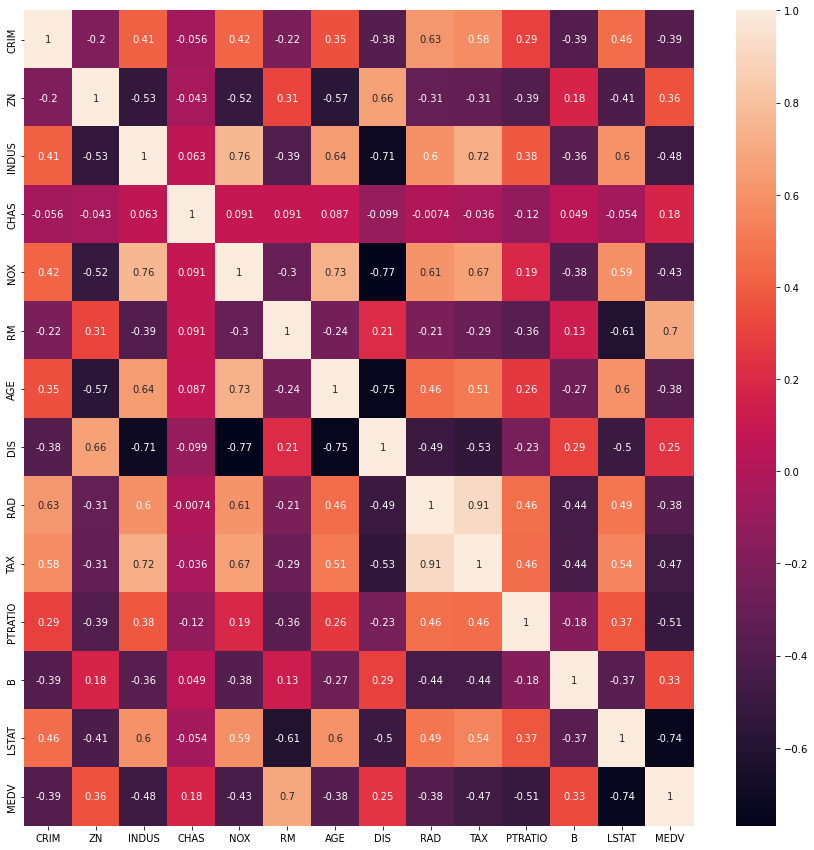

In [67]:
correlation_matrix = housing_dataset.corr(method="pearson")

fig, axs = plt.subplots(figsize = (15, 15))
sns.heatmap(correlation_matrix, annot= True)
plt.show()

In [68]:
# print(correlation_matrix)
significent_correlation_matrix_with_target = correlation_matrix[abs(correlation_matrix["MEDV"])> 0.4].loc[:, ["MEDV"]]
significent_correlation_matrix_with_target

,MEDV
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


CRIM is negatively moderately correlated with MEDV. 
ZN is moderately correlated with MEDV.
INDUS -> -ve, moderately 
CHAS -> low
NOX -> -ve, moderately
RM -> highly
AGE -> -ve, moderately
DIS ->
RAD ->
TAX ->
PTRATIO ->
B -> 
LSTAT ->

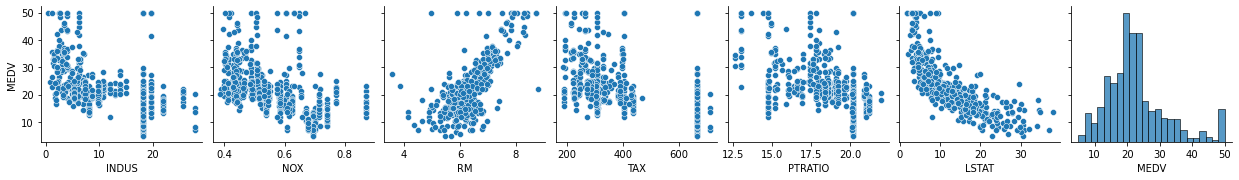

In [69]:
sns.pairplot(data= housing_dataset, x_vars= significent_correlation_matrix_with_target.index, y_vars= "MEDV")
plt.show()

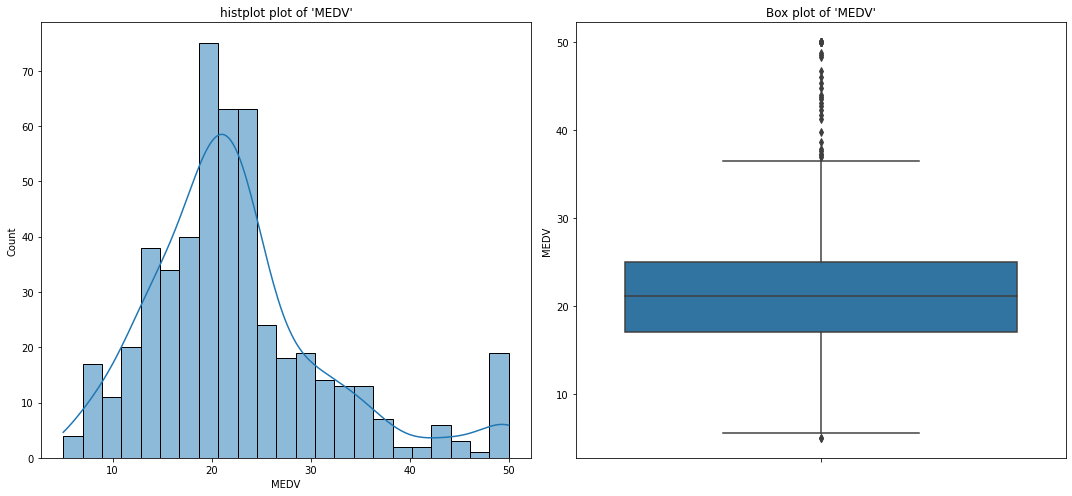

In [70]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
axs[0].set_title(f"histplot plot of 'MEDV'")
sns.histplot(data= housing_dataset, x= "MEDV", kde="True", ax= axs[0])

axs[1].set_title(f"Box plot of 'MEDV'")
sns.boxplot(data= housing_dataset, y= "MEDV", ax = axs[1])

plt.tight_layout()
plt.show()

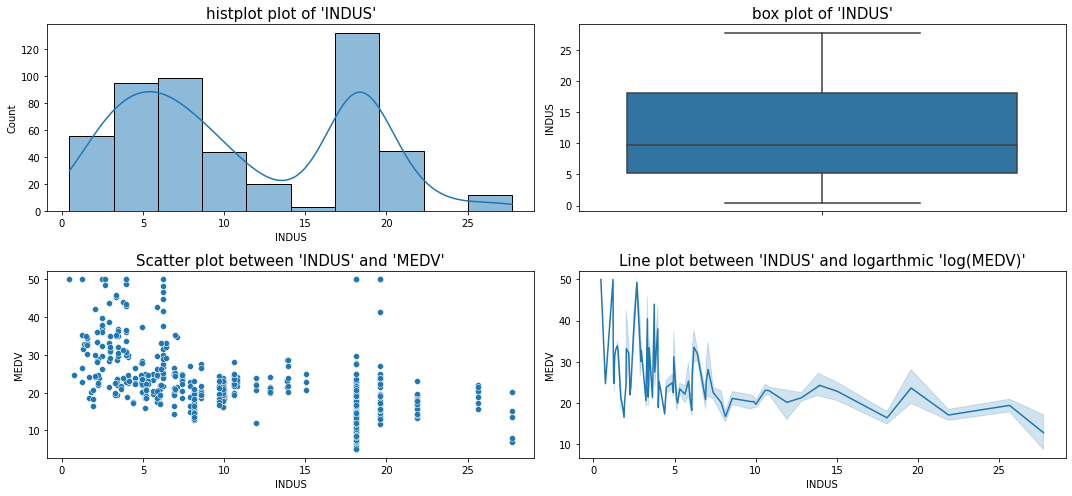

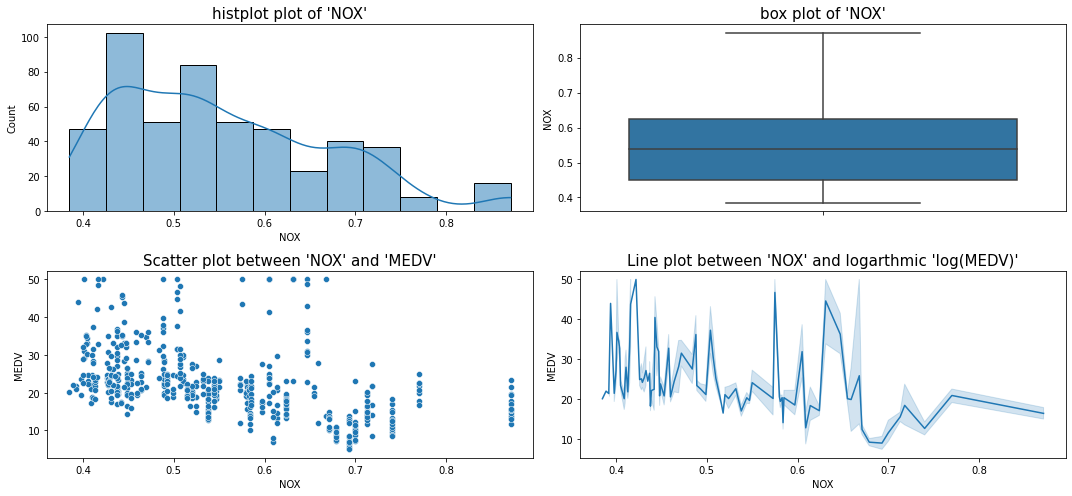

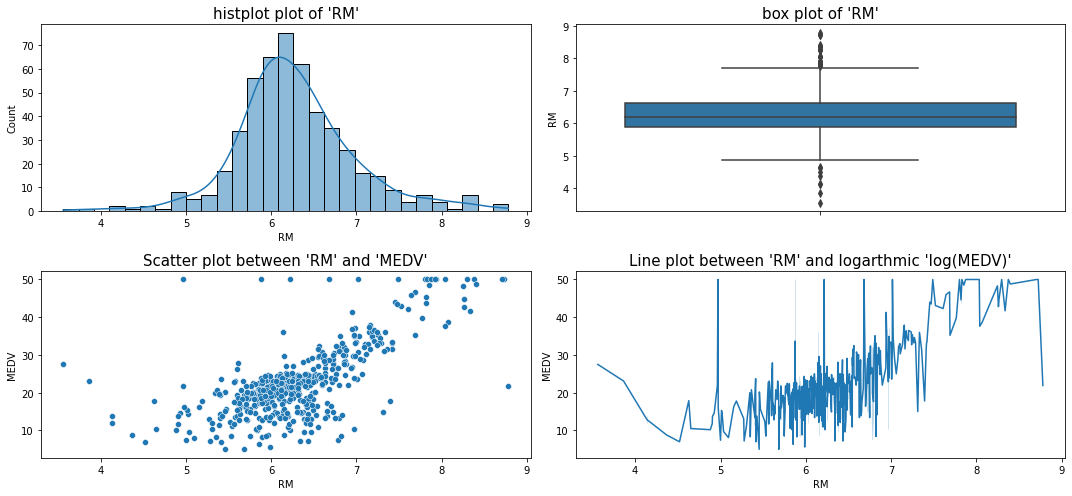

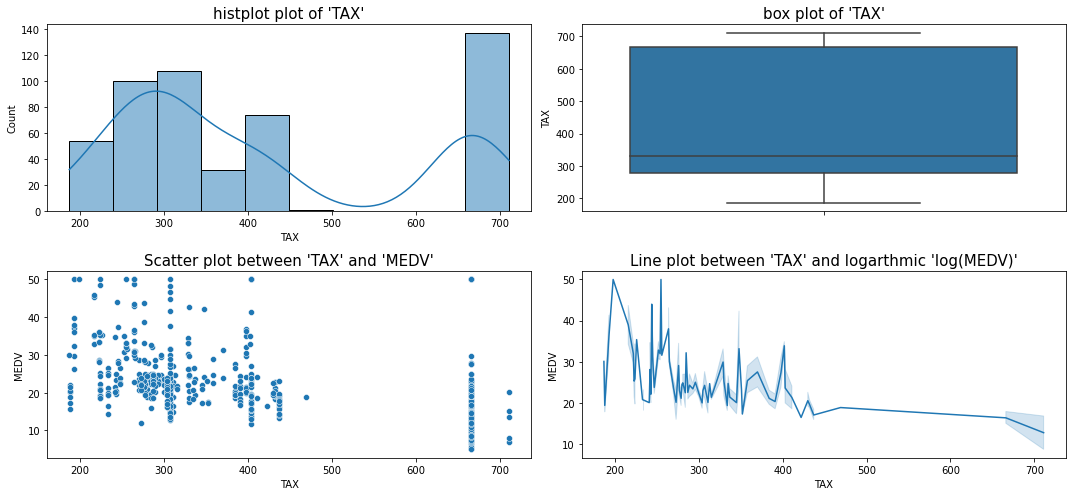

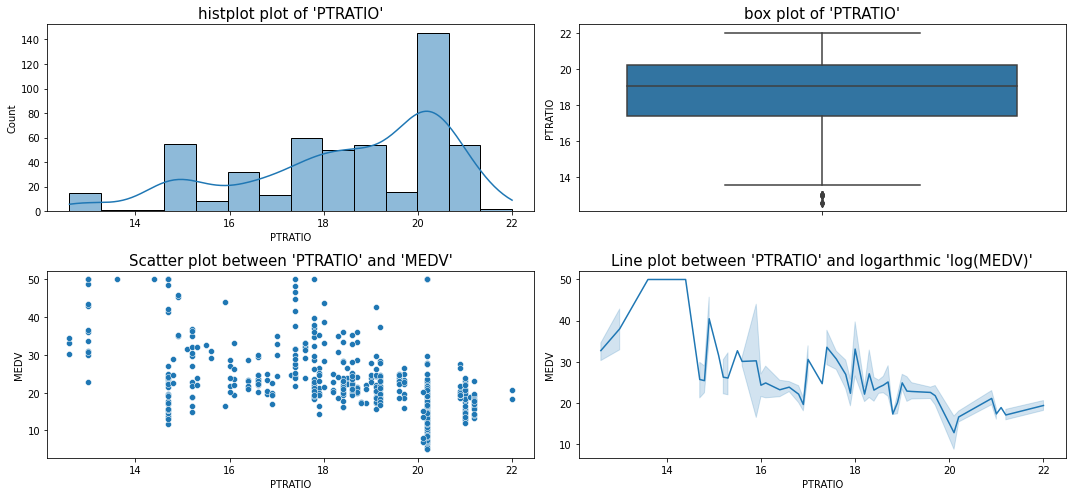

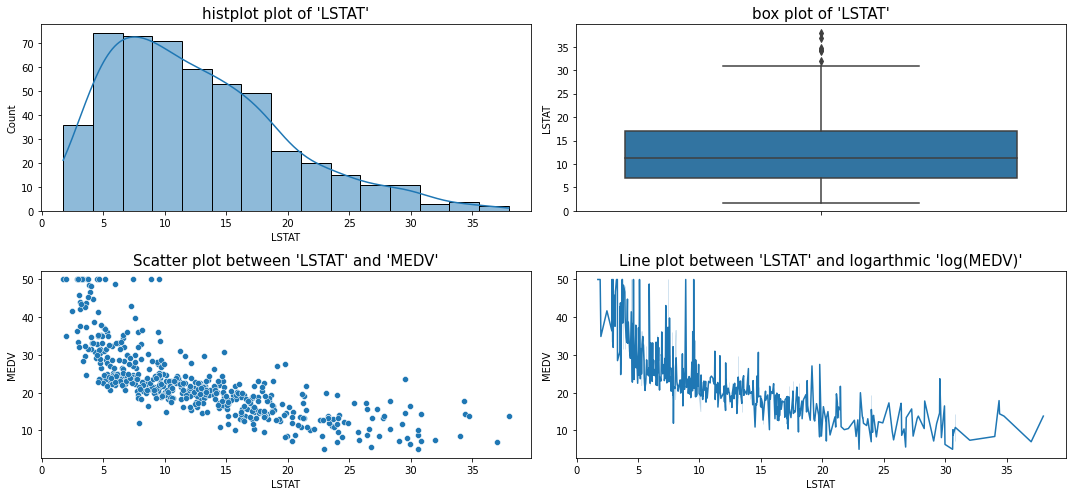

In [71]:
for column in significent_correlation_matrix_with_target.index:
    if(column != "MEDV"):
        fig, axs = plt.subplots(2, 2, figsize = (15, 7))
        
        sns.histplot(data= housing_dataset, x= column, kde=True, ax = axs[0, 0])
        # axs[0, 0].set_yscale("log")
        # axs[0,0].set_ylabel("log(Count)")
        axs[0, 0].set_title(f"histplot plot of '{column}'", fontsize = 15)
        
        sns.boxplot(data= housing_dataset, y= column, ax = axs[0, 1])
        axs[0, 1].set_title(f"box plot of '{column}'", fontsize = 15)
        
        sns.scatterplot(data= housing_dataset, x= column, y= "MEDV" , ax = axs[1, 0])
        axs[1, 0].set_title(f"Scatter plot between '{column}' and 'MEDV'", fontsize = 15)
        
        sns.lineplot(data= housing_dataset, x= column, y= "MEDV" , ax = axs[1, 1])
        # axs[1, 1].set_yscale("log")
        # axs[1, 1].set_ylabel("log(MEDV)")
        axs[1, 1].set_title(f"Line plot between '{column}' and logarthmic 'log(MEDV)'", fontsize = 15)
        
        plt.tight_layout()
        plt.show()

In [72]:
#Standardization of the data 
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# scaler.fit(housing_dataset)
standardizedOutput = scaler.fit_transform(housing_dataset)
column = housing_dataset.columns
print(standardizedOutput.shape)
standardizedHousingDataset = pd.DataFrame(data= standardizedOutput, columns= column)
print(standardizedHousingDataset.describe())
standardizedHousingDataset.head()

(506, 14)
               CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.123388e-16  7.898820e-17  2.106352e-16 -3.510587e-17 -1.965929e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 RM           AGE           DIS           RAD         TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  506.000000   
mean  -1.088282e-16 -1.474446e-16 -8.425408e-17 -1.123388e-16    0.000000   
std    1.000990e+00  1.000990e+00  1.000990e+00

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


<AxesSubplot:>

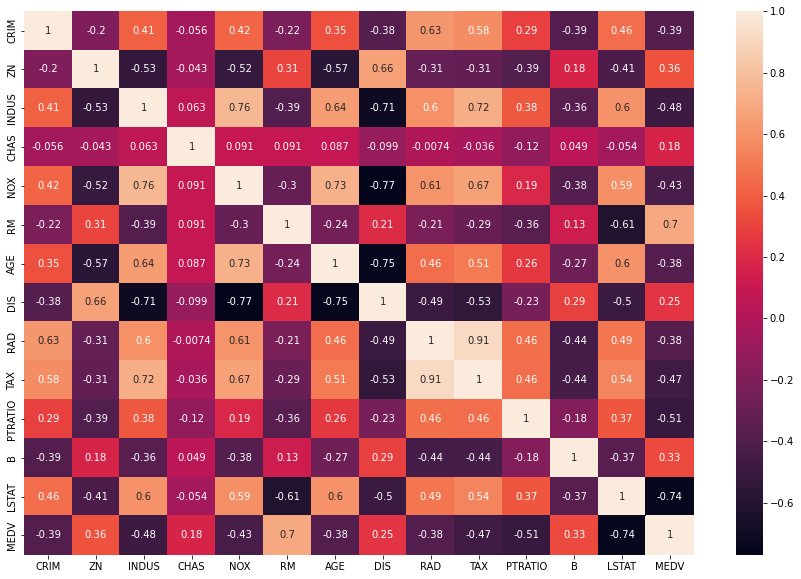

In [73]:
correlation_matrix_standardized = standardizedHousingDataset.corr(method="pearson")

fig, axs = plt.subplots(figsize = (15, 10))
sns.heatmap(correlation_matrix_standardized, annot= True)

In [74]:

significent_correlation_matrix_standardized = correlation_matrix_standardized[abs(correlation_matrix_standardized["MEDV"]) > 0.4].loc[:, ["MEDV"]]
significent_correlation_matrix_standardized

,MEDV
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


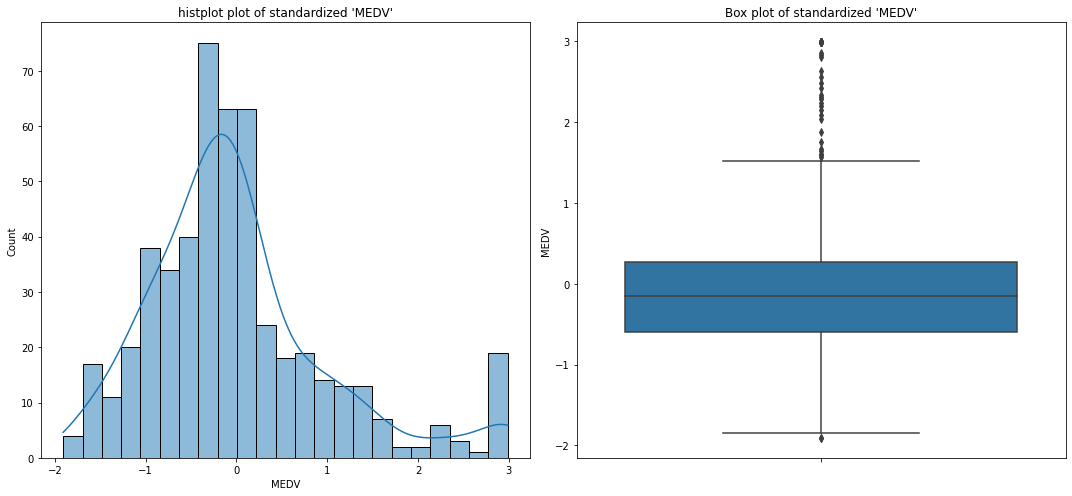

In [75]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
axs[0].set_title(f"histplot plot of standardized 'MEDV'")
sns.histplot(data= standardizedHousingDataset, x= "MEDV", kde="True", ax= axs[0])

axs[1].set_title(f"Box plot of standardized 'MEDV'")
sns.boxplot(data= standardizedHousingDataset, y= "MEDV", ax = axs[1])

plt.tight_layout()
plt.show()

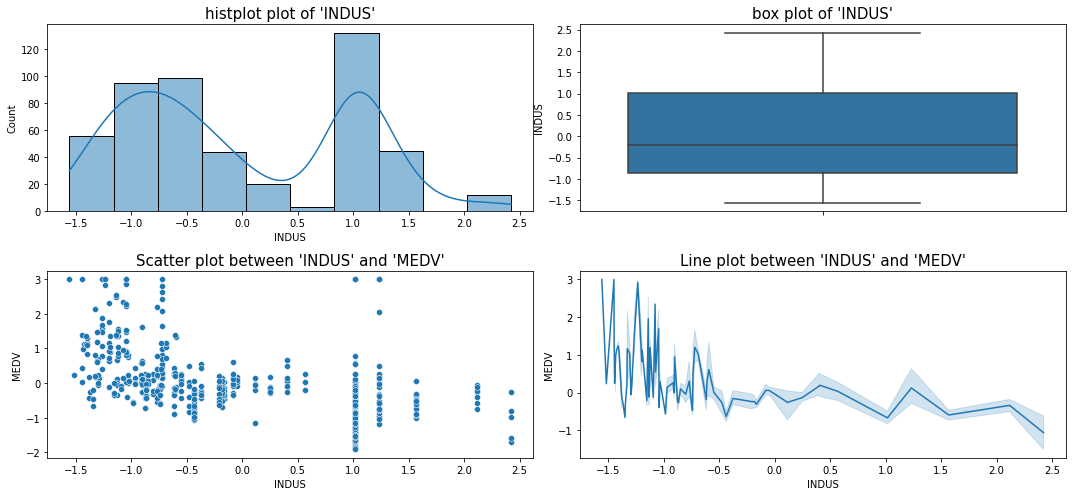

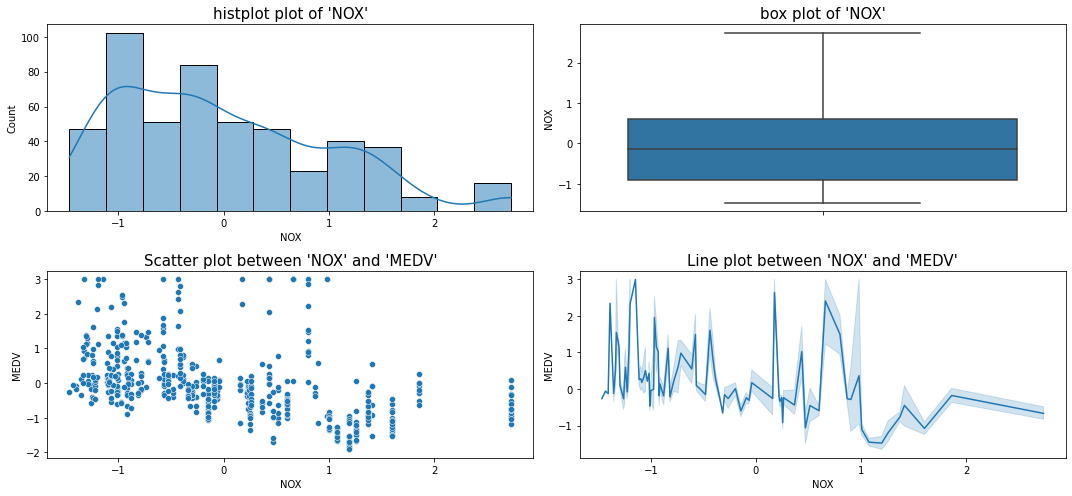

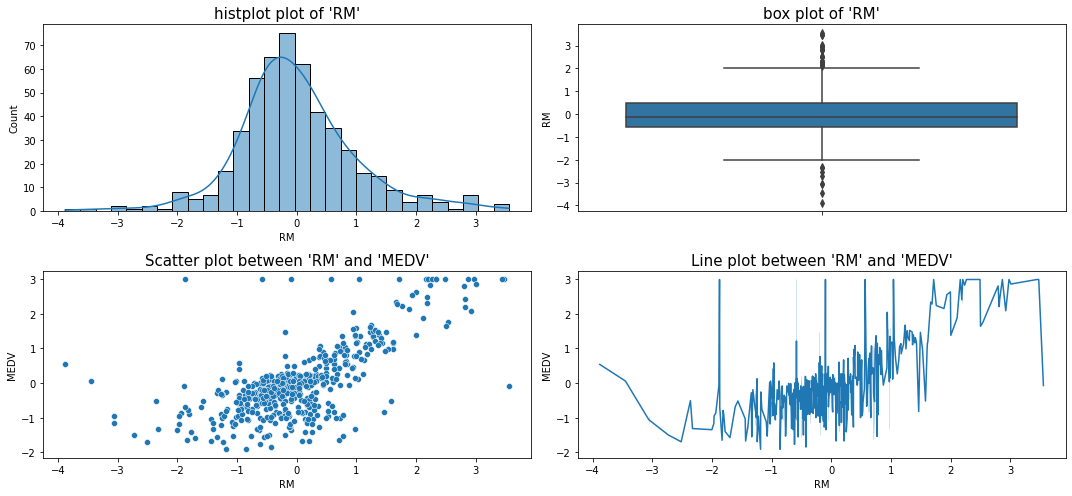

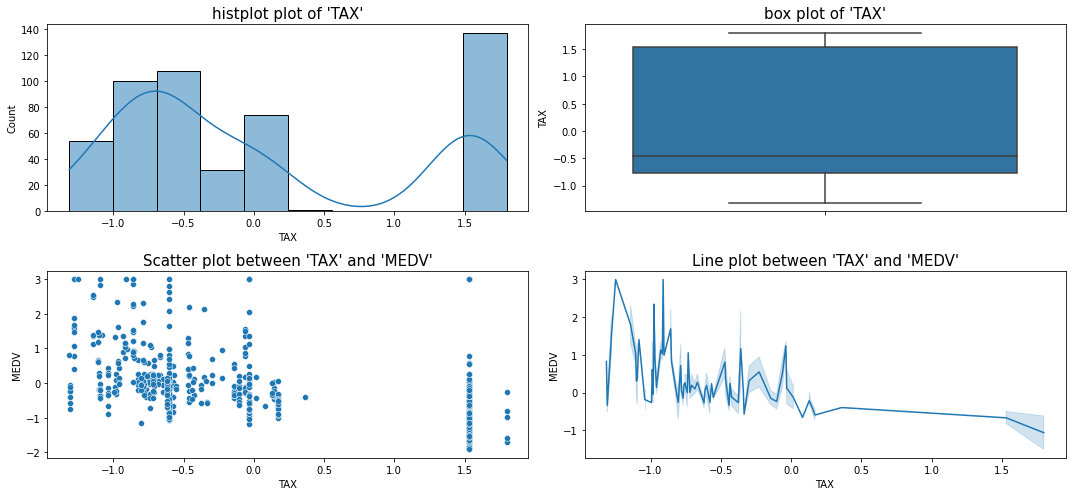

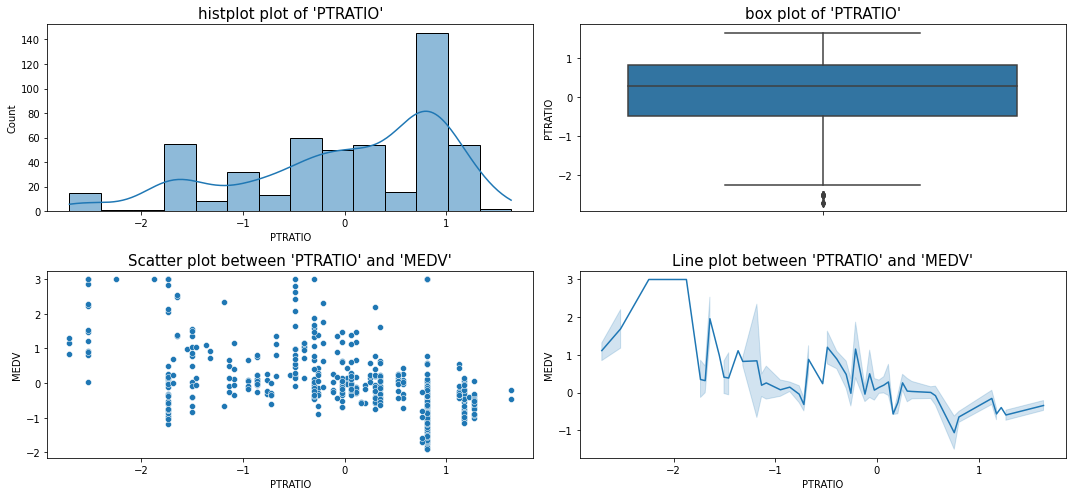

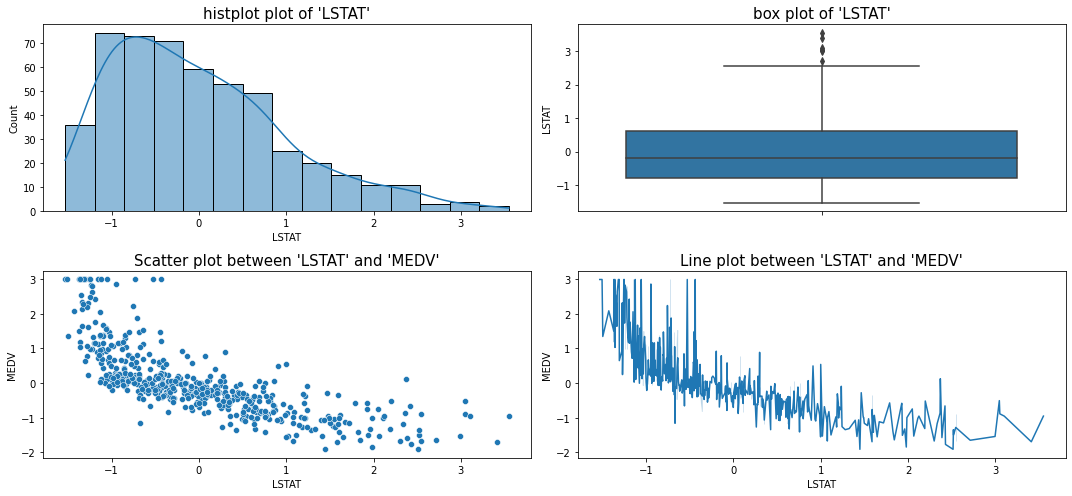

In [76]:
for column in significent_correlation_matrix_standardized.index:
    if(column != "MEDV"):
        fig, axs = plt.subplots(2, 2, figsize = (15, 7))
        
        sns.histplot(data= standardizedHousingDataset, x= column, kde=True, ax = axs[0, 0])
        # axs[0, 0].set_yscale("log")
        # axs[0,0].set_ylabel("log(Count)")
        axs[0, 0].set_title(f"histplot plot of '{column}'", fontsize = 15)
        
        sns.boxplot(data= standardizedHousingDataset, y= column, ax = axs[0, 1])
        axs[0, 1].set_title(f"box plot of '{column}'", fontsize = 15)
        
        sns.scatterplot(data= standardizedHousingDataset, x= column, y= "MEDV" , ax = axs[1, 0])
        axs[1, 0].set_title(f"Scatter plot between '{column}' and 'MEDV'", fontsize = 15)
        
        sns.lineplot(data= standardizedHousingDataset, x= column, y= "MEDV" , ax = axs[1, 1])
        # axs[1, 1].set_yscale("log")
        # axs[1, 1].set_ylabel("log(MEDV)")
        axs[1, 1].set_title(f"Line plot between '{column}' and 'MEDV'", fontsize = 15)
        
        plt.tight_layout()
        plt.show()

### Feature Scaling: Discuss the importance of feature scaling in regression analysis.

- Need to do

Task 2: Regression Analysis (25 points).
• Model Implementation: Using the provided code as a base, implement linear, ridge, lasso, and
OLS regression models.
• Model Evaluation: Evaluate each model's performance using the R^2 score and Mean
Squared Error (MSE). Discuss the implications of these metrics in the context of model
selection.
• Report results for simple and multiple linear regression.

In [77]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(housing_dataset.drop(columns= ["MEDV"]), housing_dataset[["MEDV"]], test_size=0.2, random_state=42)

# Using LinearRegression model from sklearn
linear_model = LinearRegression().fit(X_train, y_train)
y_test_predicted_linear_model = linear_model.predict(X_test)

#using ridge model from sklearn
rigged_linear_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
y_test_predicted_ridge = rigged_linear_model.predict(X_test)

#using Lasso model from sklearn
lasso_linear_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train.values.ravel())
y_test_predicted_lasso = lasso_linear_model.predict(X_test)


X_train_with_const = sm.add_constant(X_train)
ols_linear_model = sm.OLS(y_train, X_train_with_const).fit()
X_test_with_const = sm.add_constant(X_test)
y_test_predicted_ols = ols_linear_model.predict(X_test_with_const)




In [78]:
X_standardized_train, X_standardized_test, y_standardized_train, y_standardized_test = train_test_split(standardizedHousingDataset.drop(columns= ["MEDV"]), standardizedHousingDataset[["MEDV"]], test_size=0.2, random_state=42)

# Using LinearRegression model from sklearn
linear_model = LinearRegression().fit(X_standardized_train, y_standardized_train)
y_standardized_test_predicted_linear_model = linear_model.predict(X_standardized_test)

#using ridge model from sklearn
rigged_linear_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_standardized_train, y_standardized_train)
y_standardized_test_predicted_ridge = rigged_linear_model.predict(X_standardized_test)

#using Lasso model from sklearn
lasso_linear_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_standardized_train, y_standardized_train.values.ravel())
y_standardized_test_predicted_lasso = lasso_linear_model.predict(X_standardized_test)


X_standardized_train_with_const = sm.add_constant(X_standardized_train)
ols_linear_model = sm.OLS(y_standardized_train, X_standardized_train_with_const).fit()
X_standardized_test_with_const = sm.add_constant(X_standardized_test)
y_standardized_test_predicted_ols = ols_linear_model.predict(X_standardized_test_with_const)




In [79]:
from sklearn.metrics import mean_squared_error, r2_score


models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_test_predicted_ols, y_test_predicted_linear_model, y_test_predicted_ridge, y_test_predicted_lasso]
predections_standardized = [y_standardized_test_predicted_ols, y_standardized_test_predicted_linear_model, y_standardized_test_predicted_ridge, y_standardized_test_predicted_lasso]
for name, y_pred, y_standardized_prediction in zip(models, predictions, predections_standardized):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"{name} Regression R^2 score for standardized output: {r2_score(y_standardized_test, y_standardized_prediction):.4f}")
    print(f"{name} Regression MSE for standardized output: {mean_squared_error(y_standardized_test, y_standardized_prediction):.4f}\n")


OLS Regression R^2 score: 0.6688
OLS Regression MSE: 24.2911
OLS Regression R^2 score for standardized output: 0.6688
OLS Regression MSE for standardized output: 0.2877

Linear Regression R^2 score: 0.6688
Linear Regression MSE: 24.2911
Linear Regression R^2 score for standardized output: 0.6688
Linear Regression MSE for standardized output: 0.2877

Ridge Regression R^2 score: 0.6686
Ridge Regression MSE: 24.3010
Ridge Regression R^2 score for standardized output: 0.6658
Ridge Regression MSE for standardized output: 0.2903

Lasso Regression R^2 score: 0.6688
Lasso Regression MSE: 24.2888
Lasso Regression R^2 score for standardized output: 0.6682
Lasso Regression MSE for standardized output: 0.2882



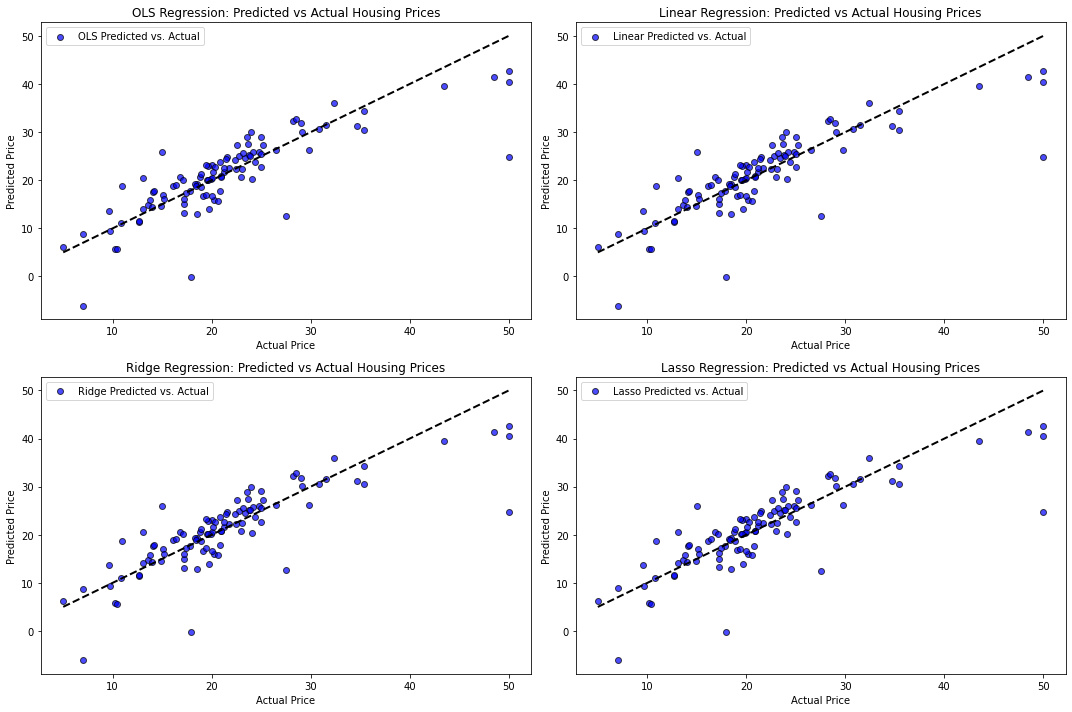

In [80]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


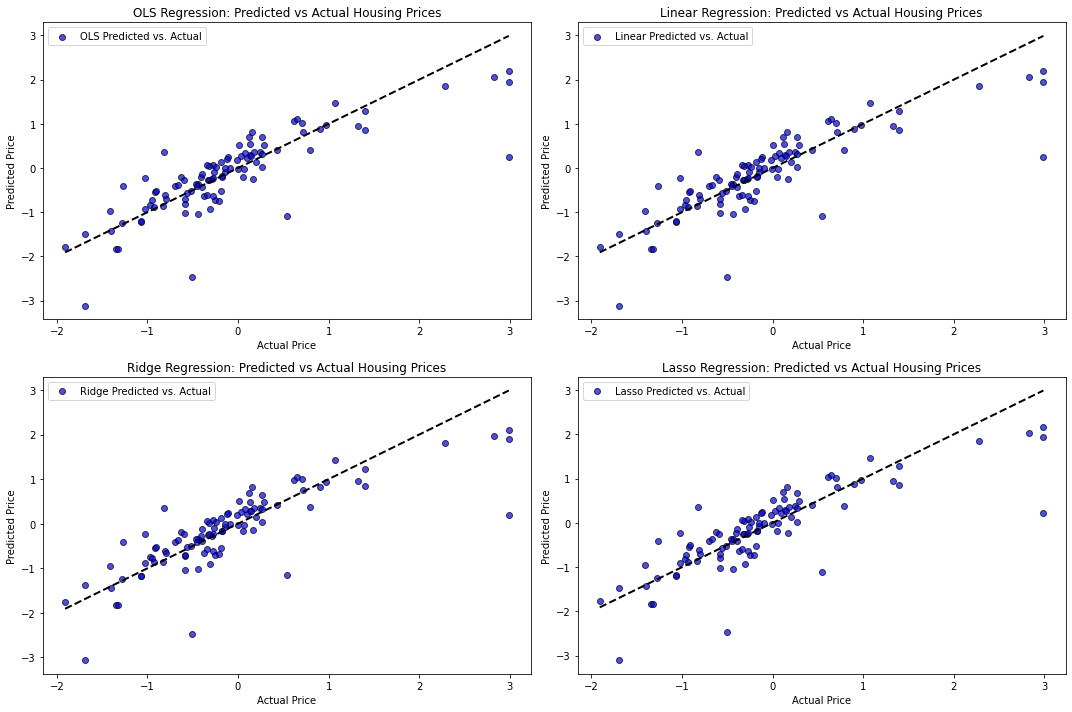

In [81]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_standardized_pred) in enumerate(zip(models, predections_standardized)):
    axs[i].scatter(y_standardized_test, y_standardized_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_standardized_test.min(), y_standardized_test.max()], [y_standardized_test.min(), y_standardized_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [82]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f